  0%|          | 0/500 [00:00<?, ?it/s]

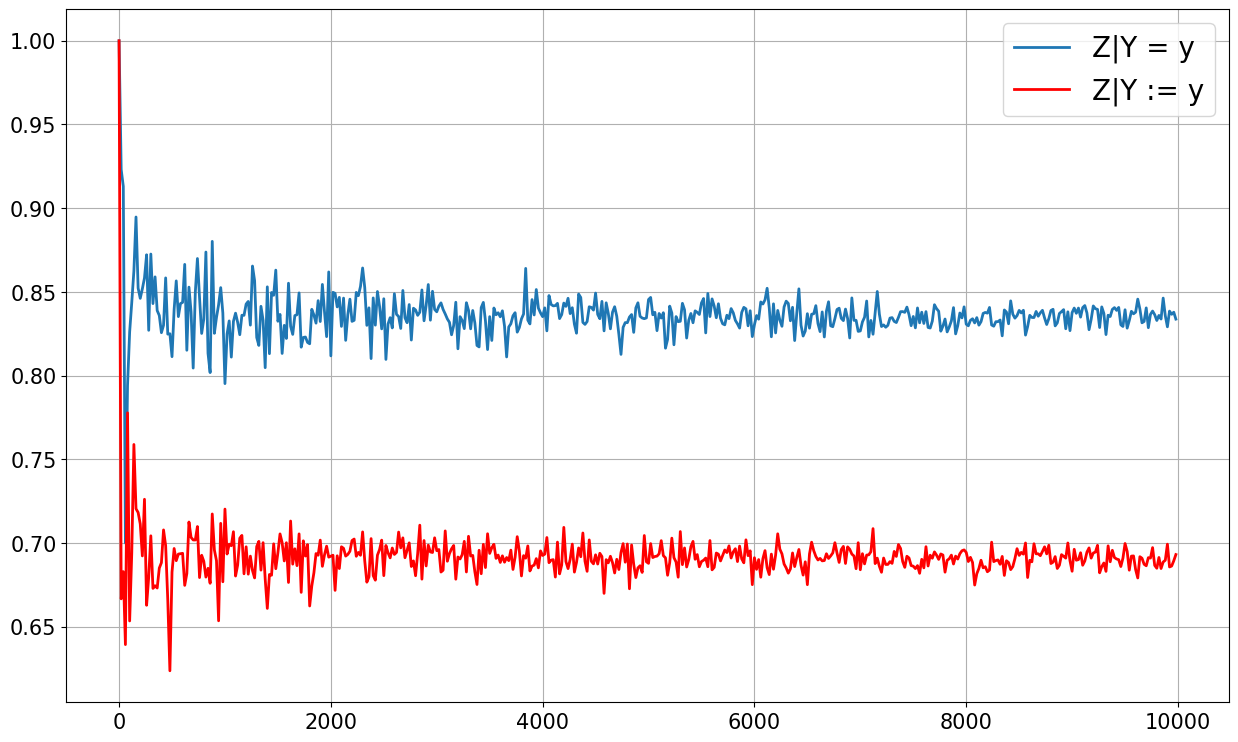

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
from tqdm.notebook import tqdm

def z_giv_y(n, z, y):
    X = st.bernoulli.rvs(1/2, size=n)
    Y = st.bernoulli.rvs( np.exp(4*X - 2)/(1+np.exp(4*X - 2)) )
    Z = st.bernoulli.rvs( np.exp( 2*(X+Y)-2 )/( 1+np.exp( 2*(X+Y)-2 ) ) )

    y_sum = np.sum(Y == y)
    return np.sum((Z == z) & (Y == y))/y_sum if y_sum > 0 else 1/2

def z_if_y(n, z, y):
    X = st.bernoulli.rvs(1/2, size=n)
    Z = st.bernoulli.rvs( np.exp( 2*(X+y)-2 )/( 1+np.exp( 2*(X+y)-2 ) ) )

    return np.sum(Z == z)/n

ns = list(range(1, 1_000_1, 20))
results_giv = []
results_if = []
for i in tqdm(ns):
    results_giv.append(z_giv_y(i, 1, 1))
    results_if.append(z_if_y(i, 1, 1))

#  Plot
font_size = 20
label_pad = 30

plt.figure(figsize=(15, 9))
plt.grid()

plt.plot(ns, results_giv, linewidth=2)
plt.plot(ns, results_if, linewidth=2, color='r')

plt.legend(['Z|Y = y', 'Z|Y := y'], fontsize=font_size)

# plt.xlabel('HP', fontsize=font_size, labelpad=label_pad)
# plt.ylabel('MPG', fontsize=font_size, labelpad=label_pad)

plt.xticks(fontsize=0.75*font_size)
plt.yticks(fontsize=0.75*font_size)

plt.show()

In [10]:
%reset -f